## GammaSpektroskopie
Der Code hier liest mit dem Vielkanalanalysator
des CASSY-Systems im `.labx` -Format gespeicherten Dateien ein 
(Beispieldatei `GammaSpektra.labx`) und stellt sie grafisch dar.



 *==* Data received:
(['1', 'Index', 'n', ''], 'length = ', 301)
(['2', 'Index', 'n', ''], 'length = ', 301)
(['3', 'Index', 'n', ''], 'length = ', 300)
(['4', 'Index', 'n', ''], 'length = ', 301)
(['5', 'Zeit', 't', 's'], 'length = ', 301)
(['6', 'Zeit', 't', 's'], 'length = ', 301)
(['7', 'Zeit', 't', 's'], 'length = ', 300)
(['8', 'Zeit', 't', 's'], 'length = ', 301)
(['9', 'Frequenz', 'f', 'Hz'], 'length = ', 0)
(['10', 'Frequenz', 'f', 'Hz'], 'length = ', 0)
(['11', 'Frequenz', 'f', 'Hz'], 'length = ', 0)
(['12', 'Frequenz', 'f', 'Hz'], 'length = ', 0)
(['13', 'Ereignisse', 'N_A', ''], 'length = ', 1024)
(['14', 'Ereignisse', 'N_A', ''], 'length = ', 1024)
(['15', 'Ereignisse', 'N_A', ''], 'length = ', 1024)
(['16', 'Ereignisse', 'N_A', ''], 'length = ', 1024)
(['17', 'Kanal', 'n_A', ''], 'length = ', 1024)
(['18', 'Kanal', 'n_A', ''], 'length = ', 1024)
(['19', 'Kanal', 'n_A', ''], 'length = ', 1024)
(['20', 'Kanal', 'n_A', ''], 'length = ', 1024)
(['21', 'Energie', 'E_A', 'keV'

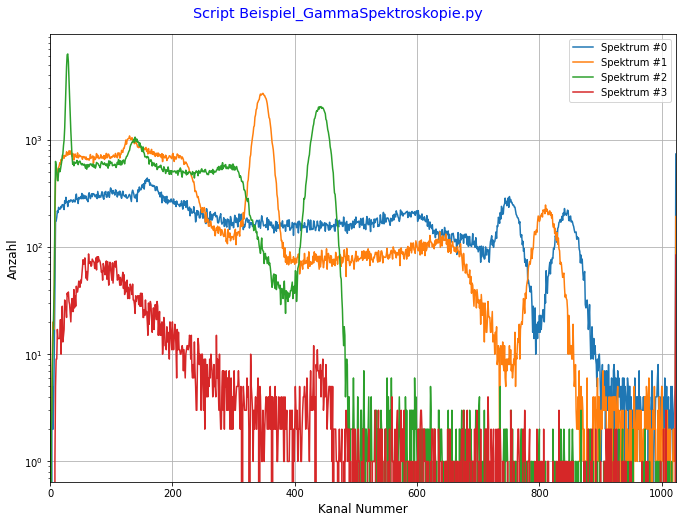

In [1]:
# -*- coding: utf-8 -*-
"""Beispiel_GammaSpektroskopie.py 
   Darstellung der Daten aus einer im CASSY labx-Format gespeicherten Datei
   am Beispiel der Gamma-Spektroskopie

   * Einlesen der Daten im .labx-Format

.. moduleauthor:: Guenter Quast <g.quast@kit.edu>

"""


# last changed: Jan 2023

# -----------------------------------------------------------
import numpy as np, sys
import PhyPraKit as ppk

# -----example Code illustrating usage --------------------
import sys, numpy as np, matplotlib.pyplot as plt
from PhyPraKit import odFit, labxParser
from scipy import interpolate
from scipy import signal

fname = "GammaSpektra.labx"
names, values = labxParser(fname, prlevel=0)

#
k = []
n = []
# collect data we are interested in:
print("\n *==* Data received:")
for i, tag in enumerate(names):
    print((tag.split(":"), "length = ", len(values[i][:])))
    tnam = tag.split(":")[1]
    if tnam == "Kanal":
        k.append(np.array(values[i][:]))
    if tnam == "Ereignisse":
        n.append(np.array(values[i][:]))
# not claer what these are ...
#  if tnam=='Zeit':   t = np.array(values[i][:])
#  if tnam=='Spannung':  U = np.array(values[i][:])


# define a Figure
fig = plt.figure("Gammaspektren", figsize=(10.0, 7.5))
fig.suptitle("Script Beispiel_GammaSpektroskopie.py", size="x-large", color="b")
fig.subplots_adjust(
    left=0.1, bottom=0.1, right=0.97, top=0.93, wspace=None, hspace=0.25
)  #
# define subplots
ax1 = fig.add_subplot(1, 1, 1)
for i in range(len(k)):
    ax1.plot(k[i], n[i], label="Spektrum #" + str(i))
ax1.set_xlabel("Kanal Nummer", size="large")
ax1.set_ylabel("Anzahl", size="large")
ax1.set_yscale("log")
ax1.set_xlim(0, 1024)
ax1.legend(loc="best", numpoints=1, prop={"size": 10})
ax1.grid()

plt.show()